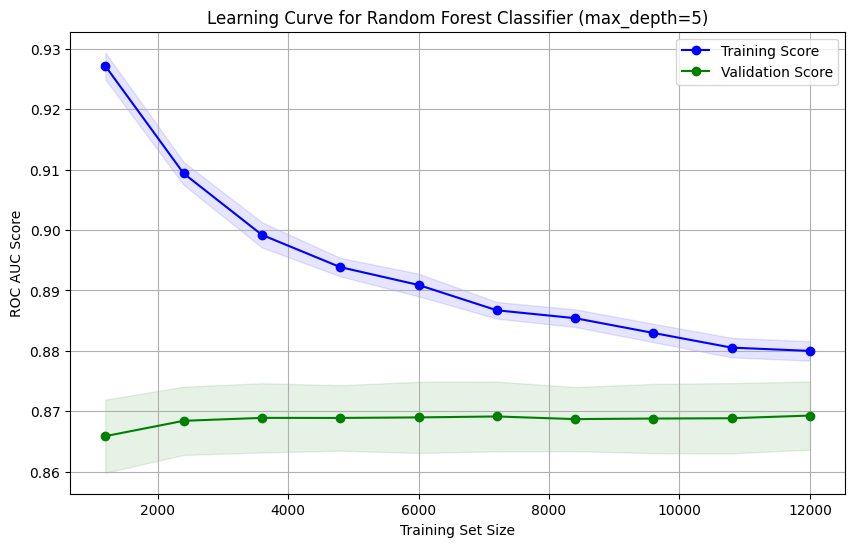

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, StratifiedKFold
import pandas as pd


train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

X = train_df.drop(['smoking', 'id'], axis=1)
y = train_df['smoking']
       


stf = StratifiedKFold(n_splits=5)

randomforest_model = RandomForestClassifier(max_depth=5)

randomforest_res = learning_curve(
    randomforest_model, 
    X, 
    y,  
    cv=stf, 
    scoring='roc_auc',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

def show_curve_plot(learning_curve_data):
    train_sizes, train_scores, val_scores = learning_curve_data

    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue', marker='o')
    plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='green', marker='o')
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, 
                     color='blue', alpha=0.1)
    plt.fill_between(train_sizes, 
                     val_scores_mean - val_scores_std, 
                     val_scores_mean + val_scores_std, 
                     color='green', alpha=0.1)

    plt.title('Learning Curve for Random Forest Classifier (max_depth=5)')
    plt.xlabel('Training Set Size')
    plt.ylabel('ROC AUC Score')
    plt.legend()
    plt.grid()
    plt.show()

show_curve_plot(randomforest_res)
